# Análisis

### Hagamos un análisis sobre los algoritmos que implementamos en `Ordenamiento.py` y `Busqueda.py`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import time
from Ordenamiento import insertionSort, selectionSort, bubbleSort
from Busqueda import busquedaLineal, busquedaBinaria

In [2]:
x = np.arange(1, 500)

### Veamos el tiempo de cómputo de los algoritmos de ordenamiento.

In [3]:
insertion_times = []
selection_times = []
bubble_times = []

for i in tqdm(x):
    s = np.random.rand(i)
    
    t_0 = time()
    insertionSort(s)
    t_f = time()
    insertion_times.append(t_f - t_0)

    t_0 = time()
    selectionSort(s)
    t_f = time()
    selection_times.append(t_f - t_0)

    t_0 = time()
    bubbleSort(s)
    t_f = time()
    bubble_times.append(t_f - t_0)

100%|██████████| 499/499 [00:23<00:00, 20.97it/s] 


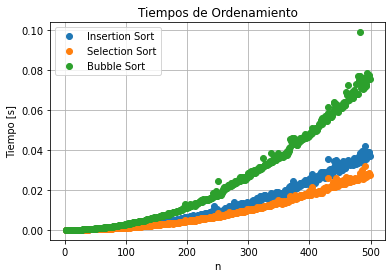

In [4]:
plt.figure('Tiempos de Ordenamiento')
plt.title('Tiempos de Ordenamiento')
plt.plot(x, insertion_times, "o", label="Insertion Sort")
plt.plot(x, selection_times, "o", label="Selection Sort")
plt.plot(x, bubble_times, "o", label="Bubble Sort")
plt.grid()
plt.legend()
plt.xlabel("n")
plt.ylabel("Tiempo [s]")
plt.savefig("Tiempos-de-Ordenamiento.png")
plt.show()

### Notemos que los tres gráficos crecen igual de rápido pero aún así hay unos más rápidos que otros. Para este problema parece ser que Selection Sort es el más rápido mientras que Bubble Sort es el más lento.

### Veamos el tiempo de cómputo de los algoritmos de búsqueda.

In [5]:
busqueda_lineal_times = []
busqueda_binaria_times = []

for i in tqdm(x):
    s = np.random.rand(i)
    j = np.random.randint(0, i)

    s.sort()

    t_0 = time()
    busquedaLineal(s, s[j])
    t_f  = time()
    busqueda_lineal_times.append(t_f - t_0)

    t_0 = time()
    busquedaBinaria(s, s[j])
    t_f  = time()
    busqueda_binaria_times.append(t_f - t_0)

100%|██████████| 499/499 [00:00<00:00, 20563.34it/s]


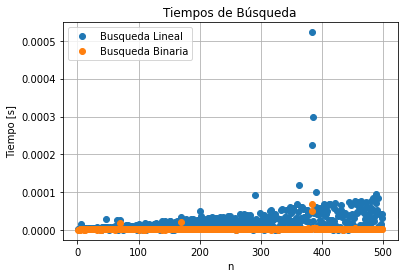

In [6]:
plt.figure('Tiempos de Búsqueda')
plt.title('Tiempos de Búsqueda')
plt.plot(x, busqueda_lineal_times, "o", label="Busqueda Lineal")
plt.plot(x, busqueda_binaria_times, "o", label="Busqueda Binaria")
plt.grid()
plt.legend()
plt.xlabel("n")
plt.ylabel("Tiempo [s]")
plt.savefig("Tiempos-de-Busqueda.png")
plt.show()

### Notemos que claramente Búsqueda Binaria es muchísimo mejor que Búsqueda Lineal, ya que crece más lento (tiene menor orden de cómputo) y además es más rápido. Búsqueda Lineal varía mucho ya que depende de la posición en la lista del número que buscamos, pero es claro que en el peor caso es de orden lineal al tamaño de la lista. Veamos Búsqueda Binaria con más detalle.

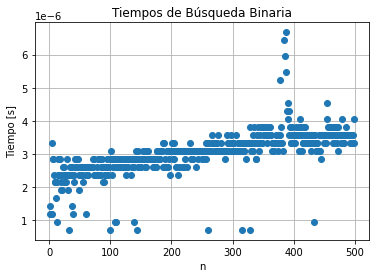

In [7]:
# Saco algunos outliers para que se vea mejor.
bb_sin_outliers = []
x_sin_outliers = []
for i in range(len(busqueda_binaria_times)):
    if busqueda_binaria_times[i] < np.mean(busqueda_binaria_times) +  3 * np.std(busqueda_binaria_times):
        bb_sin_outliers.append(busqueda_binaria_times[i])
        x_sin_outliers.append(i + 1)
bb_sin_outliers = np.asarray(bb_sin_outliers)
x_sin_outliers = np.asarray(x_sin_outliers)

plt.figure('Tiempos de Búsqueda Binaria')
plt.title('Tiempos de Búsqueda Binaria')
plt.plot(x_sin_outliers, bb_sin_outliers, "o")
plt.grid()
plt.xlabel("n")
plt.ylabel("Tiempo [s]")
plt.savefig("Tiempos-de-Busqueda-Binaria.png")
plt.show()

### Se nota que el crecimiento es logarítmico.

### Veamos cuántos turnos le lleva en promedio a Búsqueda Binaria en ganar el juego.

In [8]:
import random

In [9]:
def busquedaBinariaTurnos(s, x):
    assert len(s) > 0
    
    turnos = 0
    if (s[0] == x or s[-1] == x):
        turnos += 1
    else:
        low = 0
        high = len(s) - 1
        while low + 1 < high and s[low] != x:
            mid = int((low + high) / 2)
            if s[mid] <= x:
                low = mid
            else:
                high = mid
            turnos += 1
        
    return turnos

In [10]:
turnos = []
for i in tqdm(range(1000)):
    lista_full = [*range(1, 1001)]
    random.shuffle(lista_full)
    lista = lista_full[:100]
    lista.sort()

    num = lista[random.randint(0, 99)]

    t = busquedaBinariaTurnos(lista, num)
    turnos.append(t)

turnos = np.asarray(turnos)

100%|██████████| 1000/1000 [00:00<00:00, 3717.88it/s]


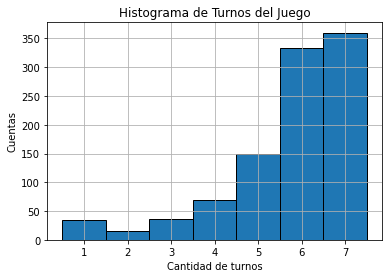

In [11]:
plt.figure('Histograma de turnos del juego')
plt.title('Histograma de Turnos del Juego')
plt.hist(turnos, [(turno - 0.5) for turno in [*range(1, np.max(turnos) + 2)]], histtype='bar', ec='black')
plt.grid()
plt.xlabel('Cantidad de turnos')
plt.ylabel('Cuentas')
plt.savefig('Histograma-de-Turnos-del-Juego.png')
plt.show()

In [12]:
print(f'Turnos promedio: {np.mean(turnos)}')
print(f'Turnos desviación: {np.std(turnos)}')

Turnos promedio: 5.723
Turnos desviación: 1.4725050084804465
